In [1]:
import pandas as pd

In [2]:
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
labels_csv = pd.read_csv('dog-breed-identification/labels.csv')

In [4]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [5]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: xlabel='breed'>

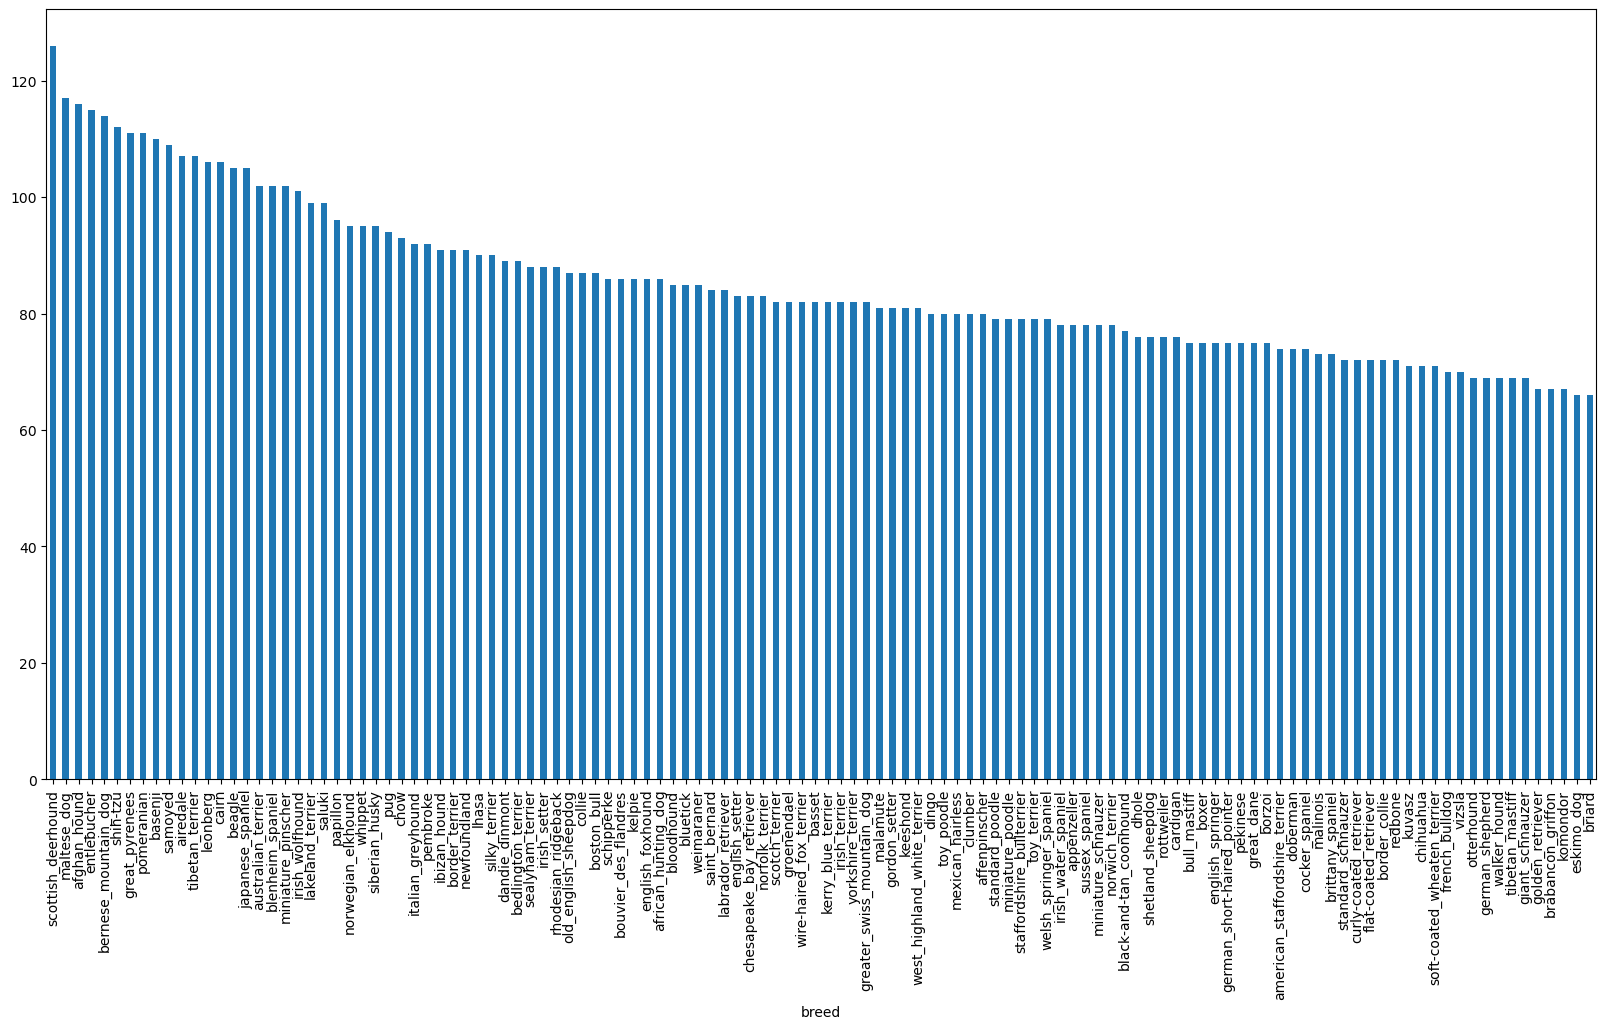

In [6]:
labels_csv['breed'].value_counts().plot(kind='bar',figsize=(20,10))

In [7]:
labels_csv['breed'].value_counts().mean()

85.18333333333334

In [8]:
filenames = ['dog-breed-identification/train/'+ fname + '.jpg' for fname in labels_csv['id']]

In [9]:
filenames[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

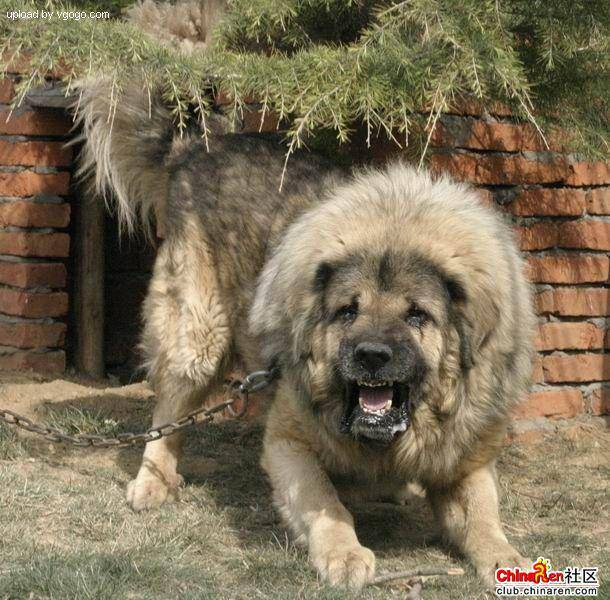

In [10]:
from IPython.display import display , Image
Image(filenames[9000])

In [11]:
import numpy as np

In [12]:
labels = labels_csv['breed'].to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [13]:
if len(labels) == len(filenames) :
  print('number of labels matches the number of filenames')
else :
  print('there might be some error')

number of labels matches the number of filenames


In [14]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [15]:
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
boolean_labels = [label == unique_breeds for label in labels]

In [17]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [18]:
print(labels[0])
print(np.where(unique_breeds == labels[0])[0][0])
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [19]:
X = filenames
y = boolean_labels

In [20]:
NUM_IMAGES = 1000 #@param {type : 'slider' , min : 1000 , max : 10000 ,step : 1000}

In [21]:
from sklearn.model_selection import train_test_split

X_train , X_val , y_train, y_val = train_test_split(X[:NUM_IMAGES] ,y[:NUM_IMAGES] , test_size = 0.2 , random_state = 42)

In [22]:
X_train[:5] , y_train[:5]

(['dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

In [23]:
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read the image
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [24]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [25]:
IMG_SIZE = 224

def process_image(image_path) :
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image , channels = 3)
  image = tf.image.convert_image_dtype(image , tf.float32)
  image = tf.image.resize(image , size = [IMG_SIZE,IMG_SIZE])
  return image

In [26]:
def get_image_label(image_path,label) :
  image = process_image(image_path)
  return image , label

In [27]:
BATCH_SIZE = 32
def create_data_batches(x,y=None , batch_size = BATCH_SIZE , valid_data = False , test_data = False) :
  if test_data :
    print('creating test data batches')
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data :
    print('creating validation data batches')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else :
    print('creating training data batches')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    data = data.shuffle(buffer_size = len(x))
    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch



In [28]:
train_data = create_data_batches(X_train , y_train)
val_data = create_data_batches(X_val , y_val , valid_data = True)

creating training data batches
creating validation data batches


In [29]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [30]:
import matplotlib.pyplot as plt
def show_25_images(images,labels) :
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

2024-03-17 03:36:14.782258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [800]
	 [[{{node Placeholder/_0}}]]
2024-03-17 03:36:14.782437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [800,120]
	 [[{{node Placeholder/_1}}]]
2024-03-17 03:36:14.804642: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


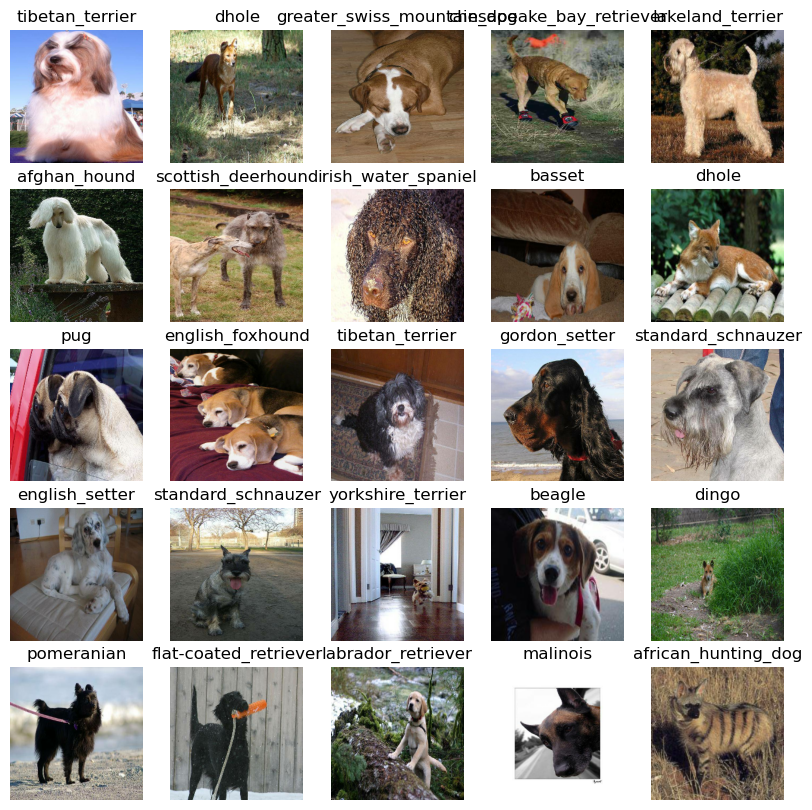

In [31]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

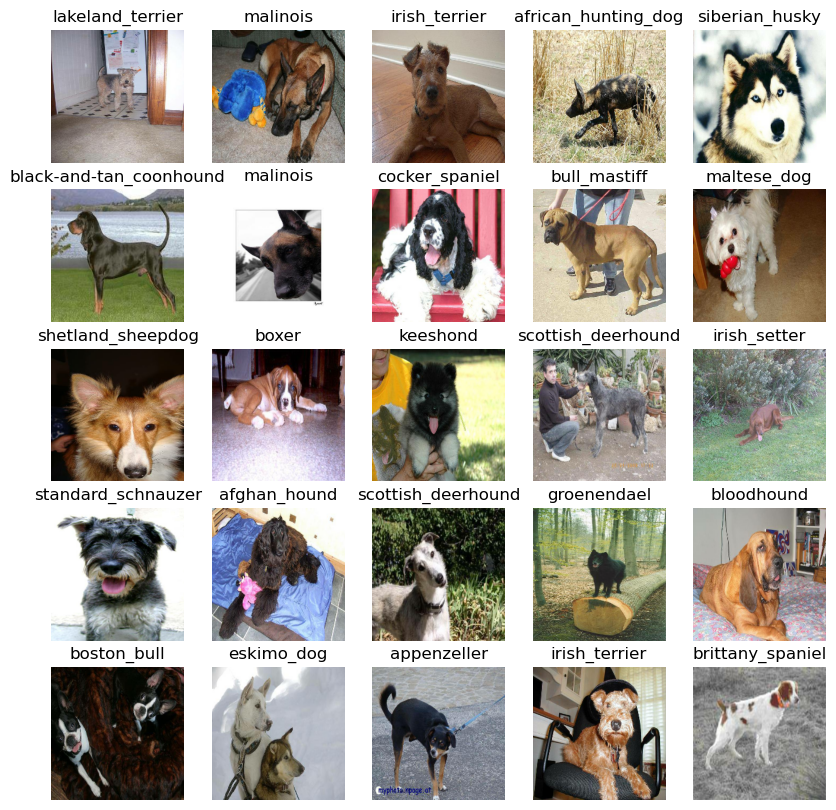

In [32]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

In [33]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [34]:

def create_model(input_shape=INPUT_SHAPE , output_shape = OUTPUT_SHAPE , model_url = MODEL_URL) :
  print('Building model with :',model_url)

  model = tf.keras.Sequential([
      hub.KerasLayer(model_url), # layer 1 , input layer
      tf.keras.layers.Dense(units = output_shape,
                            activation = 'softmax') # layer 2 (output layer)
  ])
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),# Our models wants to reduce this (how wrong its guesses are)
      optimizer = tf.keras.optimizers.Adam() , # A friend telling your model how to improve its guesses
      metrics = ['accuracy'] # we want this to go up
  )
  model.build(input_shape)
  return model
  '''
  # Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model
  '''

In [35]:
model = create_model()
model.summary()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [36]:
%load_ext tensorboard

In [37]:
import datetime ,os

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)
    

In [38]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience = 3)

In [39]:

NUM_EPOCHS = 100 # @param {type:"slider", min:0, max:100, step:1}

In [40]:
def train_model() :
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x=train_data ,
            epochs = NUM_EPOCHS,
            validation_data = val_data ,
            validation_freq = 1 ,
            callbacks = [tensorboard , early_stopping])
  return model

In [41]:
model = train_model()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Epoch 1/100


2024-03-17 03:36:19.472229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall' with dtype float and shape [?,1001]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall}}]]
2024-03-17 03:36:19.472307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/zeros_like/StatefulPartitionedCall' with dtype float and shape [?,1001]
	 [[{{node gradients/zeros_like/StatefulPartitionedCall}}]]
2024-03-17 03:36:19.472356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicat

25/25 [==============================] - ETA: 0s - loss: 4.7232 - accuracy: 0.0988

2024-03-17 03:36:32.522036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [200,120]
	 [[{{node Placeholder/_1}}]]


25/25 [==============================] - 18s 645ms/step - loss: 4.7232 - accuracy: 0.0988 - val_loss: 3.5008 - val_accuracy: 0.2350
Epoch 2/100
25/25 [==============================] - 20s 800ms/step - loss: 1.7147 - accuracy: 0.6587 - val_loss: 2.2385 - val_accuracy: 0.4650
Epoch 3/100
25/25 [==============================] - 20s 806ms/step - loss: 0.5841 - accuracy: 0.9337 - val_loss: 1.6988 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 19s 777ms/step - loss: 0.2563 - accuracy: 0.9875 - val_loss: 1.5172 - val_accuracy: 0.6100
Epoch 5/100
25/25 [==============================] - 21s 844ms/step - loss: 0.1481 - accuracy: 0.9962 - val_loss: 1.4316 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 21s 854ms/step - loss: 0.1016 - accuracy: 0.9987 - val_loss: 1.3925 - val_accuracy: 0.6400
Epoch 7/100
25/25 [==============================] - 21s 830ms/step - loss: 0.0758 - accuracy: 1.0000 - val_loss: 1.3714 - val_accuracy: 0.6550
Epoc

In [42]:
predictions = model.predict(val_data , verbose = 1) # verbose shows how long there is to go 

7/7 [==============================] - 4s 560ms/step


In [43]:
predictions

array([[7.61227391e-04, 6.58306308e-05, 1.47728226e-03, ...,
        1.03389764e-04, 8.73701993e-06, 6.00180915e-03],
       [5.47998934e-04, 1.43275611e-04, 2.84109311e-03, ...,
        3.92993243e-04, 1.03271147e-03, 8.38512642e-05],
       [1.24737130e-06, 3.88678973e-06, 1.78389280e-04, ...,
        3.27357520e-05, 1.07284659e-05, 5.83429282e-05],
       ...,
       [4.45757632e-06, 1.85809604e-05, 9.22871368e-06, ...,
        2.25747699e-05, 1.03149963e-04, 1.15951007e-05],
       [3.95368133e-03, 9.22722975e-05, 4.65859921e-05, ...,
        1.95445245e-05, 8.07060223e-06, 4.39583091e-03],
       [3.22038977e-04, 3.74070296e-05, 6.47330249e-04, ...,
        1.22443736e-02, 1.09672570e-03, 6.60029327e-05]], dtype=float32)

In [44]:
predictions.shape

(200, 120)

In [45]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[7.61227391e-04 6.58306308e-05 1.47728226e-03 9.86885134e-05
 7.25853723e-04 5.86094102e-05 1.21697802e-02 1.60121213e-04
 4.23901038e-05 2.90611322e-04 1.53229921e-04 2.39394703e-05
 1.76956732e-04 9.40266909e-06 8.37850530e-06 1.85209763e-04
 4.16926086e-05 2.51346081e-01 1.13074611e-05 5.41262234e-05
 6.68390363e-04 6.37172780e-04 3.78863951e-05 1.20000250e-03
 1.64664489e-05 2.09243022e-04 4.65174139e-01 2.67256455e-05
 1.21548923e-03 6.20842853e-04 1.53370565e-04 1.27225509e-03
 8.17019318e-04 4.81945572e-05 2.02238916e-05 1.17067145e-02
 1.18601120e-05 1.05451269e-04 6.59506477e-05 3.63864456e-05
 2.78853026e-04 3.69883446e-06 1.94188779e-05 1.74726752e-04
 1.57954782e-05 7.85958855e-06 5.42104790e-05 9.16492863e-05
 1.75609617e-04 2.94438476e-04 1.06672727e-04 1.45371553e-06
 2.14709638e-04 7.16525756e-06 4.62228258e-04 4.09826243e-05
 6.86644053e-05 1.30801217e-03 4.27439263e-05 6.78609163e-02
 1.79126844e-04 3.28009228e-05 2.97358143e-04 9.12231826e-06
 2.74335878e-04 1.613423

In [46]:
model.evaluate(val_data)

7/7 [==============================] - 5s 640ms/step - loss: 1.2648 - accuracy: 0.6800


[1.2647901773452759, 0.6800000071525574]

In [47]:
def get_pred_label(prediction_proba) :
    return unique_breeds[np.argmax(prediction_proba)]
pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

In [48]:
def unbatchify(data) :
    images = []
    labels = []
    for image , label in data.unbatch().as_numpy_iterator() :
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images , labels
val_images , val_labels = unbatchify(val_data)
val_images[0],val_labels[0]

2024-03-17 03:41:34.387387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [200,120]
	 [[{{node Placeholder/_1}}]]


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [49]:
def plot_pred(predictions , labels , images ,n = 1 ) :
    pred_prob , true_label , image = predictions[n] , labels[n] , images[n]

    pred_label = get_pred_label(pred_prob)

    # plot image and remove ticks 
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Change the color of the title on the basis of it being right or wrong 
    if pred_label == true_label :
        color = 'green'
    else :
        color = 'red'
    plt.title('{} {:2.0f}% ({})'.format(pred_label,
                                       np.max(pred_prob)*100,
                                       true_label),
             color=color)

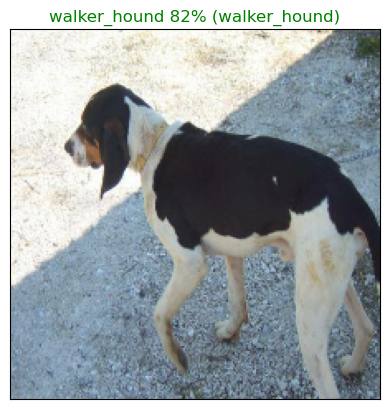

In [50]:
plot_pred(predictions , val_labels , val_images , n=31)

In [51]:
def plot_pred_conf(predict_proba , labels , n=1):
    pred_prob , true_label = predictions[n] , labels[n] 
    # Get predicted labels
    pred_label = get_pred_label(pred_prob)

    # Find the top q0 predicted confidences indexes
    top_10_predicted_indexes = pred_prob.argsort()[-10:][::-1]
    # find the top 10 predicted confidences values
    top_10_predicted_values  = pred_prob[top_10_predicted_indexes]
    # Find the toop 10 prediction labels 
    top_10_predicted_labels =  unique_breeds[top_10_predicted_indexes]

    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_predicted_labels)),
                      top_10_predicted_values,
                      color = 'grey')
    plt.xticks(np.arange(len(top_10_predicted_labels)),
              labels=top_10_predicted_labels,
              rotation = 'vertical')
    # Change color of true label
    if np.isin(true_label, top_10_predicted_labels):
        top_plot[np.argmax(top_10_predicted_labels == true_label)].set_color("green")
    else:
        pass

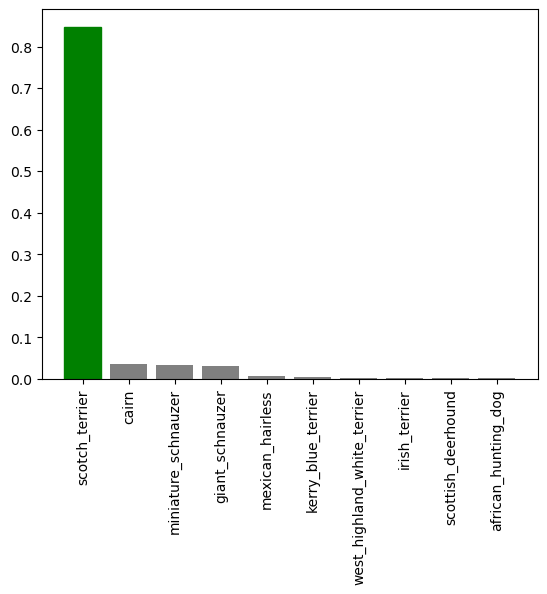

In [52]:
plot_pred_conf(predictions , val_labels)

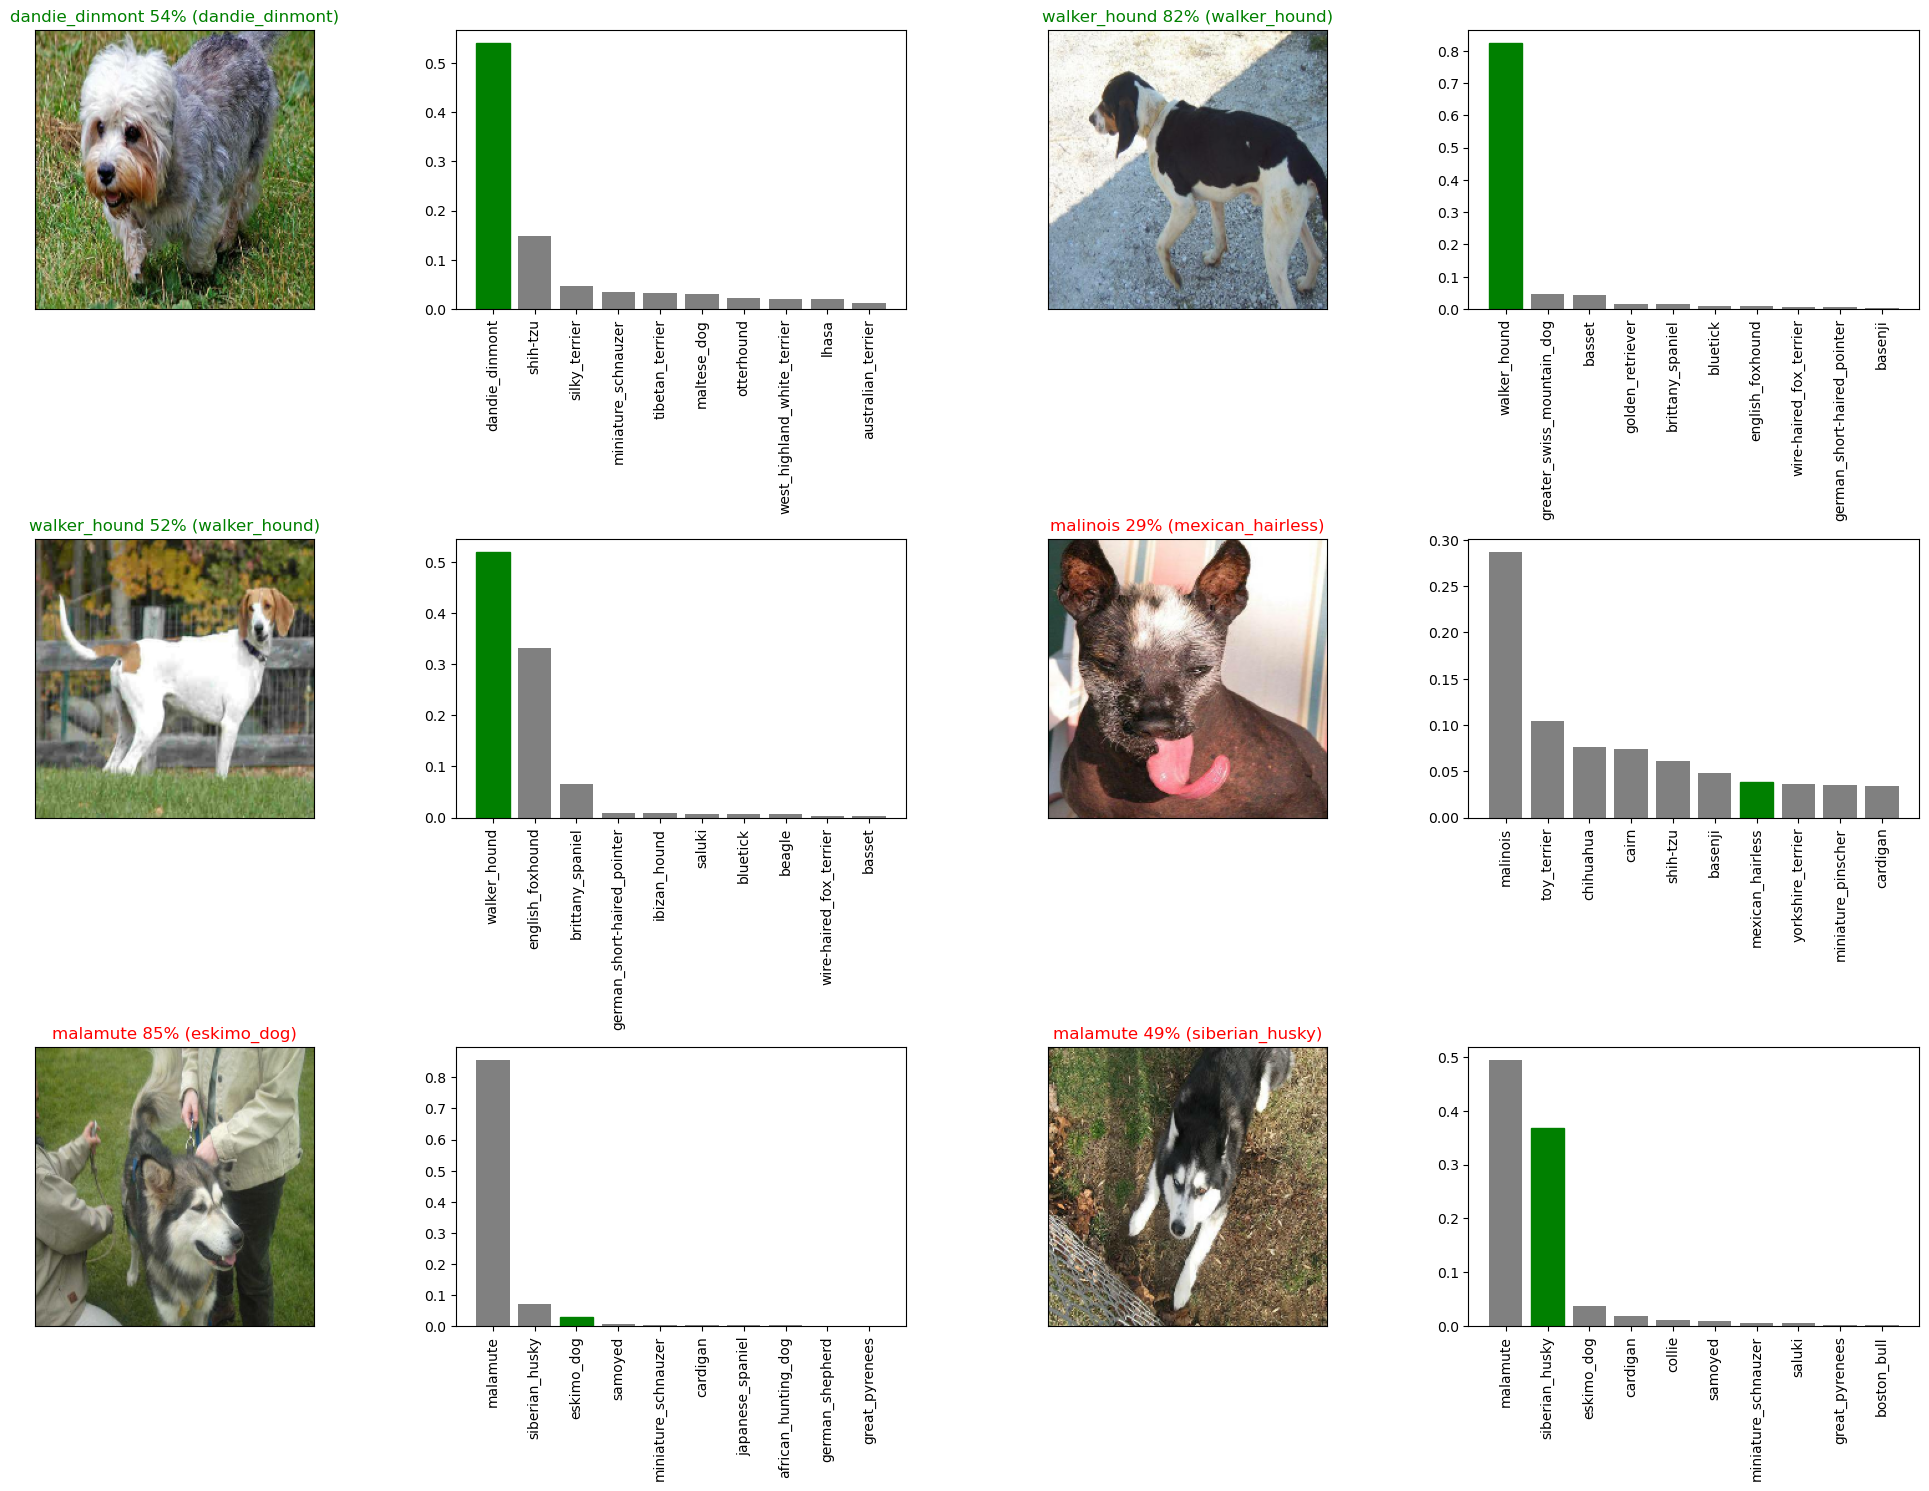

In [53]:
# Checking some predictions
i_multiplier = 30
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (5*2*num_cols , 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [54]:
def save_model(model,suffix = None) :
    # Create a model directory with current time 
    modeldir = os.path.join('models',datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
    model_path = modeldir + '-' + suffix + '.h5'  # Save format of the model 
    print(f'saving model to {model_path}...')
    model.save(model_path)
    return model_path

In [55]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [56]:
save_model(model , suffix='1000-images-Adam')

saving model to models/20240317-03411710627095-1000-images-Adam.h5...


'models/20240317-03411710627095-1000-images-Adam.h5'

In [57]:
# Load our model trained on 1000 images 
model_1000_images = load_model('models/20240317-03231710626032-1000-images-Adam.h5')

Loading saved model from: models/20240317-03231710626032-1000-images-Adam.h5


# Training a Model on Full Data

In [58]:
# Reminding the size of the full data
len(X) , len(y)

(10222, 10222)

In [59]:
# turn full training data into data batches
full_data = create_data_batches(X,y)

creating training data batches


In [60]:
full_model = create_model()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [64]:
# Create full model callbacks

# Tensorboard callbacks 
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note no validation data on the full training set so can monitor validation accuracy
full_model_early_stopping  =tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                            patience = 3)

In [65]:
# Fit the full model to the full training data 
full_model.fit(x=full_data , 
              epochs = NUM_EPOCHS ,
              callbacks=[full_model_tensorboard,
                        full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 219s 686ms/step - loss: 0.5687 - accuracy: 0.8314
Epoch 2/100
320/320 [==============================] - 205s 640ms/step - loss: 0.3024 - accuracy: 0.9133
Epoch 3/100
320/320 [==============================] - 215s 671ms/step - loss: 0.1879 - accuracy: 0.9535
Epoch 4/100
320/320 [==============================] - 144s 449ms/step - loss: 0.1249 - accuracy: 0.9736
Epoch 5/100
320/320 [==============================] - 81s 254ms/step - loss: 0.0875 - accuracy: 0.9837
Epoch 6/100
320/320 [==============================] - 78s 243ms/step - loss: 0.0660 - accuracy: 0.9900
Epoch 7/100
320/320 [==============================] - 89s 279ms/step - loss: 0.0512 - accuracy: 0.9927
Epoch 8/100
320/320 [==============================] - 91s 284ms/step - loss: 0.0402 - accuracy: 0.9961
Epoch 9/100
320/320 [==============================] - 88s 276ms/step - loss: 0.0327 - accuracy: 0.9972
Epoch 10/100
320/320 [==============================] - 84s 

In [66]:
# Save model to a file 
save_model(full_model, suffix = 'all-images-Adam')

saving model to models/20240317-04191710629341-all-images-Adam.h5...


'models/20240317-04191710629341-all-images-Adam.h5'

In [68]:
# Load in the full model 
loaded_full_model = load_model('models/20240317-04191710629341-all-images-Adam.h5')

Loading saved model from: models/20240317-04191710629341-all-images-Adam.h5


In [80]:
# load test images filenames
test_path  = 'dog-breed-identification/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['dog-breed-identification/test/266490a2b053a4a3bf68e779f28fb5a9.jpg',
 'dog-breed-identification/test/dae9fd18836d8df20989ef0101771d4b.jpg',
 'dog-breed-identification/test/079a40f22b0fad9a66f76797b62bb930.jpg',
 'dog-breed-identification/test/ab8462f9a501d362041d47582fddc9ad.jpg',
 'dog-breed-identification/test/8895089b432e020cc42e6262b5a1c2dd.jpg',
 'dog-breed-identification/test/985ae7fc271ac4a0d131e546c0f95bb6.jpg',
 'dog-breed-identification/test/77c1ab99cffb817d54fb14f229aeb118.jpg',
 'dog-breed-identification/test/ad7e50abca9b7c6a88b63946c5bbe493.jpg',
 'dog-breed-identification/test/d61a09cecf56666cdb315ebce4b93c43.jpg',
 'dog-breed-identification/test/cb120c57904e8c0694bbe259c58a873c.jpg']

In [81]:
len(test_filenames)

10357

In [82]:
# Create test data batch 
test_data  = create_data_batches(test_filenames , test_data = True)

creating test data batches


In [ ]:
# Make predictions on test data batches using the loaded full model 
test_predictions = loaded_full_model.predict(test_data , verbose = 1)

 30/324 [=>............................] - ETA: 1:03

In [ ]:
# Check out the test predictions
test_predictions[:10]